In [6]:
import torch
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.decomposition import PCA
import numpy as np 
from __future__ import absolute_import, division, print_function
import pyro
from pyro.contrib.gp.util import Parameterized
import pyro.distributions as dist
import pyro.infer as infer
import pyro.optim as optim
from pyro.params import param_with_module_name
import pyro.contrib.gp as gp
import pyro.distributions as dist
import matplotlib.pyplot as plt
pyro.clear_param_store()
import tensorflow as tf
import numpy as np 
import pandas as pd
import numpy
import math
import cProfile
import time
import GPy
import numpy as np
from matplotlib import pyplot as plt

#import statsmodels.api as sm
#import sympy as sp
#import pymc
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats
from scipy.special import gamma
from GPy.core.parameterization.variational import NormalPosterior, NormalPrior

#from sympy.interactive import printing
import pyro.contrib.gp.models.vsgp as vsgp
from GPy.util.linalg import pdinv
from pyro.infer.mcmc.hmc import HMC
from pyro.infer.mcmc import MCMC
from matplotlib import pyplot
pyro.clear_param_store()
import time
torch.manual_seed(12)
pyro.set_rng_seed(101)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.decomposition import PCA
import numpy as np 
import gpflow

In [7]:
import pandas as pd
data = pd.read_csv('LSVT_voice_rehabilitation.csv')
label= data['OQ->prc5_95']
data = data.drop(['OQ->prc5_95'],axis=1)
X = np.array(data)

In [8]:
N = X.shape[0]
sample_mean = np.mean(X[:N,:])
sample_std = np.std(X[:N,:])
sample_norm = (X[:N,:] - sample_mean)/sample_std # normalisation
X_flat = np.array(sample_norm)

In [14]:
from sklearn.decomposition import PCA, KernelPCA
from sklearn import manifold, datasets

In [10]:
kpca = KernelPCA(kernel="rbf", fit_inverse_transform=True,n_components=15)
X_kpca = kpca.fit_transform(X_flat)
X_back = kpca.inverse_transform(X_kpca)

In [15]:
Iso = manifold.Isomap(n_neighbors=2, n_components=15)
X_back = Iso.fit_transform(X_flat)

In [32]:
methods = ['standard']
labels = ['LLE']
for i, method in enumerate(methods):
    X_back = manifold.LocallyLinearEmbedding(n_neighbors=2, n_components=15,
                                        eigen_solver='auto',
                                        method=method).fit_transform(X_flat)

In [26]:
from sklearn.decomposition import PCA
pca = PCA(n_components=15)
X_back = pca.fit_transform(X_flat)

In [36]:
mds = manifold.MDS(n_components=15, max_iter=100, n_init=1)
X_back = mds.fit_transform(X_flat)

In [44]:
Iso = manifold.Isomap(n_neighbors=2, n_components=15)
X_back = Iso.fit_transform(X_flat)

In [41]:
se = manifold.SpectralEmbedding(n_components=15,
                                n_neighbors=2)
X_back = se.fit_transform(X_flat)

 /home/aneeqr/.local/lib/python3.6/site-packages/sklearn/manifold/spectral_embedding_.py:234: UserWarning:Graph is not fully connected, spectral embedding may not work as expected.


In [69]:
pca_dims = PCA()
pca_dims.fit(X_flat)
cumsum = np.cumsum(pca_dims.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
d

1

Text(0.5,1,'PCA Explained Variance Ratio')

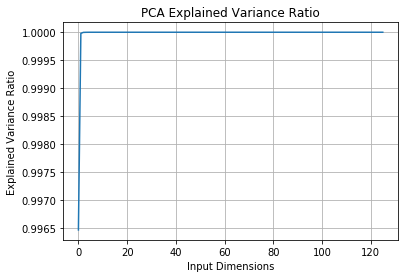

In [70]:
plt.figure()
plt.plot(list(range(len(pca_dims.explained_variance_ratio_))),cumsum)
plt.grid()
plt.xlabel('Input Dimensions')
plt.ylabel('Explained Variance Ratio')
plt.title('PCA Explained Variance Ratio')

In [78]:
kpca = KernelPCA(kernel="rbf", fit_inverse_transform=True)
X_kpca = kpca.fit_transform(X_flat)
explained_variance = numpy.var(X_kpca, axis=0)
explained_variance_ratio = explained_variance / numpy.sum(explained_variance)

In [83]:
cumsum2 = np.cumsum(explained_variance_ratio)
d = np.argmax(cumsum2 >= 0.95) + 1

4

In [60]:
import pickle

In [84]:
a={}
a['PCA_dim']=  list(range(len(pca_dims.explained_variance_ratio_)))
a['dim'] = X_flat.shape
a['PCA_ratio'] = cumsum
a['KPA_ratio'] = cumsum2
pickle.dump(a, open( "LSVTPCA.p", "wb" ) )

In [63]:
X_flat.shape

(126, 309)

In [ ]:
pickle.dump()

In [49]:
kpca = KernelPCA(kernel="rbf", fit_inverse_transform=True)
X_kpca = kpca.fit_transform(X_flat)
explained_variance = numpy.var(X_kpca, axis=0)
explained_variance_ratio = explained_variance / numpy.sum(explained_variance)

In [57]:
a = numpy.cumsum(explained_variance_ratio)
d=1
for i in a:
    if i > 0.95:
        print(d)
        break
    d+=1

4


In [45]:
dd_orig = distance_matrix(X_flat)
dd_proj = distance_matrix(X_back)
nn_orig = dd_orig.argsort()
nn_proj = dd_proj.argsort()
ranks_proj = rank_matrix(dd_proj)
ks=[1,3,5,7,10]
j=0
cont=[]
for k in ks:
    moved = []
    for i in range(X_flat.shape[0]):
        moved.append(moved_out(nn_orig, nn_proj, i, k))
    cont.append(trustcont_sum(moved, ranks_proj, k))
    print('Neearest neighbourboost size k =' + str(k)+ ' ' + 'Continuity:' + str(cont[j]))
    j+=1

Neearest neighbourboost size k =1 Continuity:0.981694828469022
Neearest neighbourboost size k =3 Continuity:0.9452971271153089
Neearest neighbourboost size k =5 Continuity:0.88954802259887
Neearest neighbourboost size k =7 Continuity:0.8502612639258602
Neearest neighbourboost size k =10 Continuity:0.8083099906629319


In [46]:
ranks_orig =rank_matrix(dd_orig)
trust = []
j=0
for k in ks:
    moved = []
    for i in range(X_flat.shape[0]):
        moved.append(moved_in(nn_orig, nn_proj, i, k))
    trust.append(trustcont_sum(moved, ranks_orig, k))
    print('Neearest neighbourboost size k =' + str(k)+ ' ' + 'Trust:' + str(trust[j]))
    j+=1

Neearest neighbourboost size k =1 Trust:0.9167306707629288
Neearest neighbourboost size k =3 Trust:0.9087410905592723
Neearest neighbourboost size k =5 Trust:0.8723701910142588
Neearest neighbourboost size k =7 Trust:0.8490584639652963
Neearest neighbourboost size k =10 Trust:0.8180995475113122


In [5]:
def d_euclidean(a,b):
    """Returns euclidean distance between vectors a and b"""

    return math.sqrt(sum([ (x - y)**2 for (x,y) in zip (a,b) ]))
def rank_matrix(x):
    """Returns rank matrix from pairwise distance matrix a"""
    
    m = x.argsort()
    r = numpy.zeros(x.shape)

    vectors = x.shape[0]

    for i in range(vectors):
        for j in range(vectors):
            pos = numpy.where(m[i,:]==j)
            r[i,j] = pos[0][0] # there should be a better syntax for this
        
    return r.astype('int')


def centering(x):
    """Center matrix x to origo"""
    return x - x.mean(axis=0)


def double_centering(x):
    """Double center matrix x"""
    pass

def distance_matrix(x, distf=None):
    """Returns distance matrix of pairwise distances between vectors
    stored in array a

    distf is function used to calculate distance between vectors,
    if None, euclidean distance is used
    """

    if distf == None:
        distf = d_euclidean

    vectors = x.shape[0]
    d = numpy.zeros([vectors, vectors])

    for i in range(vectors):
        for j in range(i,vectors):
            dd = distf(x[i,:], x[j,:])
            d[i,j] = dd
            d[j,i] = dd

    return d
def moved_out(nn_orig, nn_proj, i, k):
    """Determine points that were neighbours in the original space,
    but are not neighbours in the projection space.

    nn_orig
      neighbourhood matrix for original data

    nn_proj
      neighbourhood matrix for projection data

    i
      index of the point considered

    k
      size of the neighbourhood considered

    Return a list of indices for 'moved out' values 
    """

    oo = list(nn_orig[i, 1:k+1])
    pp = list(nn_proj[i, 1:k+1])

    for j in pp:
        if (j in pp) and (j in oo):
            oo.remove(j)

    return oo
def moved_in(nn_orig, nn_proj, i, k):
    """Determine points that are neighbours in the projection space,
    but were not neighbours in the original space.

    nn_orig
      neighbourhood matrix for original data

    nn_proj
      neighbourhood matrix for projection data

    i
      index of the point considered

    k
      size of the neighbourhood considered

    Return a list of indices for points which are 'moved in' to point i
    """

    pp = list(nn_proj[i, 1:k+1])
    oo = list(nn_orig[i, 1:k+1])

    for j in oo:
        if (j in oo) and (j in pp):
            pp.remove(j)

    return pp


def scaling_term(k, n):
    """Term that scales measure between zero and one

    k  size of the neighbourhood
    n  number of datapoints
    """

    if k < (n / 2.0):
        return 2.0 / ((n*k)*(2*n - 3*k - 1))
    else:
        return 2.0 / (n * (n - k) * (n - k - 1))


def trustcont_sum(moved, ranks, k):
    """Calculate sum used in trustworthiness or continuity calculation.

    moved

       List of lists of indices for those datapoints that have either
       moved away in (Continuity) or moved in (Trustworthiness)
       projection

    ranks

       Rank matrix of data set. For trustworthiness, ranking is in the
       original space, for continuity, ranking is in the projected
       space.

    k
       size of the neighbournood
    """

    n = ranks.shape[0]
    s = 0

    # todo: weavefy this for speed
    for i in range(n):
        for j in moved[i]:
            s = s + (ranks[i, j] - k)

    a = scaling_term(k, n)

    return 1 - a * s